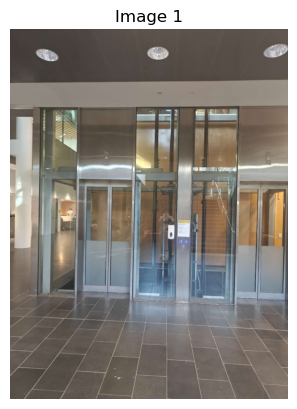

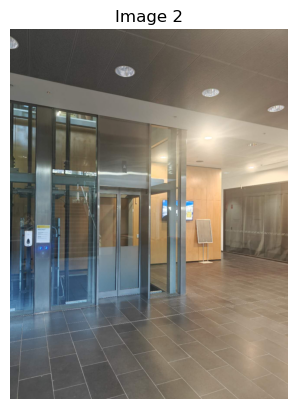

In [7]:
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('image1.jpg')
img2 = cv2.imread('image2.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')
plt.show()

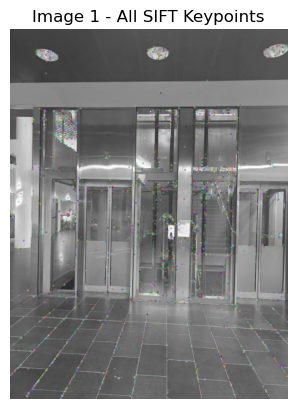

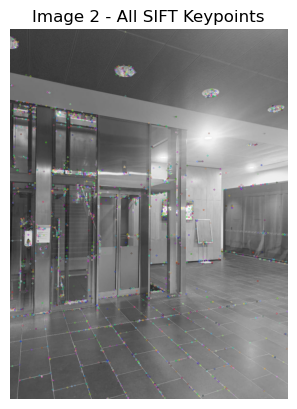

In [8]:

sift = cv2.SIFT_create()


kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)


img1_kp = cv2.drawKeypoints(gray1, kp1, None)
img2_kp = cv2.drawKeypoints(gray2, kp2, None)


plt.imshow(img1_kp)
plt.title('Image 1 - All SIFT Keypoints')
plt.axis('off')
plt.show()

plt.imshow(img2_kp)
plt.title('Image 2 - All SIFT Keypoints')
plt.axis('off')
plt.show()

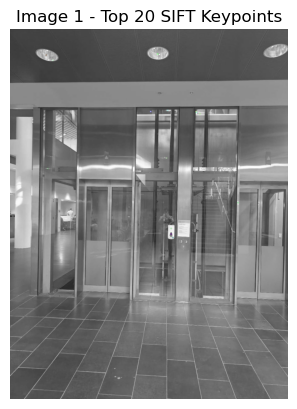

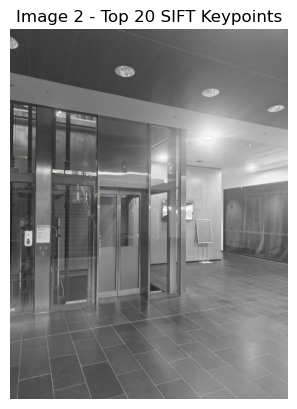

In [ ]:
#create a SIFT detector with a limit on the number of features
# This will limit the number of keypoints detected to a maximum of 20
sift_few = cv2.SIFT_create(nfeatures=20)
# Detect and compute keypoints and descriptors with the limited SIFT detector
kp1_few, des1_few = sift_few.detectAndCompute(gray1, None)
kp2_few, des2_few = sift_few.detectAndCompute(gray2, None)
img1_kp_few = cv2.drawKeypoints(gray1, kp1_few, None)
img2_kp_few = cv2.drawKeypoints(gray2, kp2_few, None)

plt.imshow(img1_kp_few)
plt.title('Image 1 - Top 20 SIFT Keypoints')
plt.axis('off')
plt.show()

plt.imshow(img2_kp_few)
plt.title('Image 2 - Top 20 SIFT Keypoints')
plt.axis('off')
plt.show()


 Task 1: SIFT Feature Extraction
a) Extracting SIFT Features with Default Parameters
We used OpenCV’s cv2.SIFT_create() to create a SIFT detector and extracted keypoints and descriptors from both grayscale images. The detected keypoints were visualized using cv2.drawKeypoints().

This step reveals which areas of the images contain distinctive visual features that are invariant to scale changes, such as corners, edges, or strong textures.

b) Reducing the Number of Keypoints to 20 Most Prominent Ones
To make the keypoint distribution easier to observe and analyze, we set the nfeatures parameter of SIFT_create() to 20, limiting the output to the 20 most prominent keypoints.

Example:
sift_few = cv2.SIFT_create(nfeatures=20)
This allows us to focus on the most distinctive and reliable features in the images, which is beneficial for the following tasks involving keypoint matching and transformation.
The input images used were two real photos taken with a smartphone, containing overlapping regions of a structured scene.

In [10]:
# Resize the images to 120% of their original size
scaled1 = cv2.resize(gray1, None, fx=1.2, fy=1.2)
scaled2 = cv2.resize(gray2, None, fx=1.2, fy=1.2)


In [11]:
# Detect and compute SIFT keypoints and descriptors on the scaled images
kp1_scaled, des1_scaled = sift_few.detectAndCompute(scaled1, None)
kp2_scaled, des2_scaled = sift_few.detectAndCompute(scaled2, None)


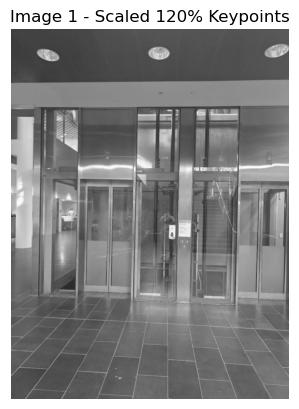

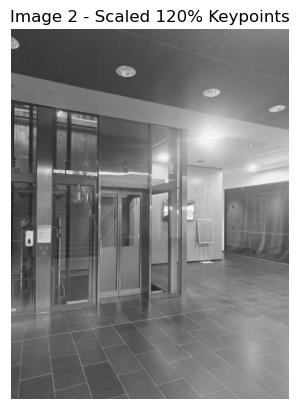

In [12]:
img1_scaled_kp = cv2.drawKeypoints(scaled1, kp1_scaled, None)
img2_scaled_kp = cv2.drawKeypoints(scaled2, kp2_scaled, None)

plt.imshow(img1_scaled_kp)
plt.title('Image 1 - Scaled 120% Keypoints')
plt.axis('off')
plt.show()

plt.imshow(img2_scaled_kp)
plt.title('Image 2 - Scaled 120% Keypoints')
plt.axis('off')
plt.show()


In [13]:
def rotate_img(img, angle):
    h, w = img.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(img, M, (w, h))


In [14]:
rotated1 = rotate_img(gray1, -60)
rotated2 = rotate_img(gray2, -60)


In [15]:
kp1_rotated, des1_rotated = sift_few.detectAndCompute(rotated1, None)
kp2_rotated, des2_rotated = sift_few.detectAndCompute(rotated2, None)


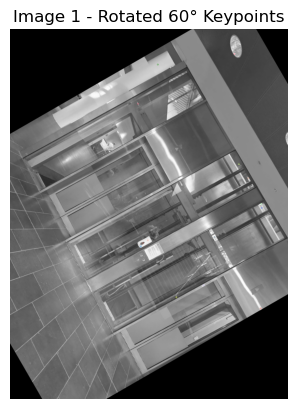

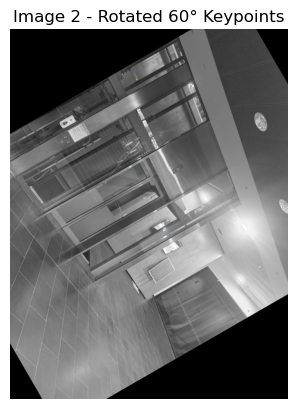

In [16]:
img1_rot_kp = cv2.drawKeypoints(rotated1, kp1_rotated, None)
img2_rot_kp = cv2.drawKeypoints(rotated2, kp2_rotated, None)

plt.imshow(img1_rot_kp)
plt.title('Image 1 - Rotated 60° Keypoints')
plt.axis('off')
plt.show()

plt.imshow(img2_rot_kp)
plt.title('Image 2 - Rotated 60° Keypoints')
plt.axis('off')
plt.show()


In [17]:
from skimage.util import random_noise
import numpy as np
# Add salt and pepper noise to the grayscale images
# Ensure the images are in the correct format for random_noise
noisy1 = (random_noise(gray1, mode='s&p', amount=0.02) * 255).astype(np.uint8)
noisy2 = (random_noise(gray2, mode='s&p', amount=0.02) * 255).astype(np.uint8)


In [18]:
kp1_noisy, des1_noisy = sift_few.detectAndCompute(noisy1, None)
kp2_noisy, des2_noisy = sift_few.detectAndCompute(noisy2, None)


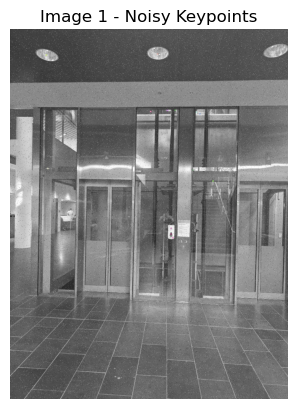

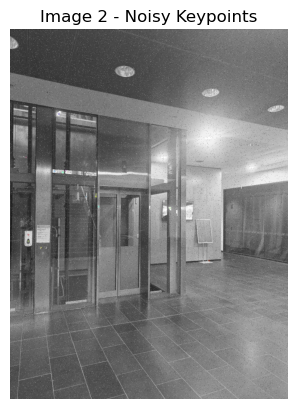

In [19]:
img1_noisy_kp = cv2.drawKeypoints(noisy1, kp1_noisy, None)
img2_noisy_kp = cv2.drawKeypoints(noisy2, kp2_noisy, None)

plt.imshow(img1_noisy_kp, cmap='gray')
plt.title('Image 1 - Noisy Keypoints')
plt.axis('off')
plt.show()

plt.imshow(img2_noisy_kp, cmap='gray')
plt.title('Image 2 - Noisy Keypoints')
plt.axis('off')
plt.show()


 Task 2: Robustness of SIFT to Image Transformations
In this task, we tested the robustness of SIFT feature detection under three types of image transformations: scaling, rotation, and noise. For each transformation, we extracted and visualized the 20 most prominent keypoints using the same SIFT settings as in Task 1b.
🔹 a) Scaling (Enlarged by 120%)
We resized both images to 120% of their original size and applied SIFT to extract features.
The keypoints detected in the scaled images largely correspond to those in the original images.
 SIFT is highly robust to scale changes, as expected due to its scale-invariant design.

🔹 b) Rotation (Rotated by 60° Clockwise)
We rotated both images by 60 degrees clockwise and extracted the keypoints.
Most keypoints remained consistent in terms of their relative positions within the image structure.
SIFT demonstrates strong rotational robustness, maintaining keypoint detection even with large orientation changes.

🔹 c) Salt and Pepper Noise
We added salt-and-pepper noise to both images and extracted keypoints using SIFT.
The number of detected keypoints dropped slightly.
Some regions failed to detect reliable keypoints due to noise disrupting local textures.
SIFT is less robust to image noise, especially when the noise intensity increases.

Conclusion:
SIFT performs very well under scaling and rotation, maintaining stable keypoint detection. However, it is more sensitive to random noise, which can affect its reliability in degraded image conditions.

In [33]:
# create a BFMatcher object
bf = cv2.BFMatcher()

#using the full descriptors
matches = bf.knnMatch(des1_few, des2_few, k=2)

# Apply ratio test to filter out good matches
# This is the Lowe's ratio test to filter out false matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)


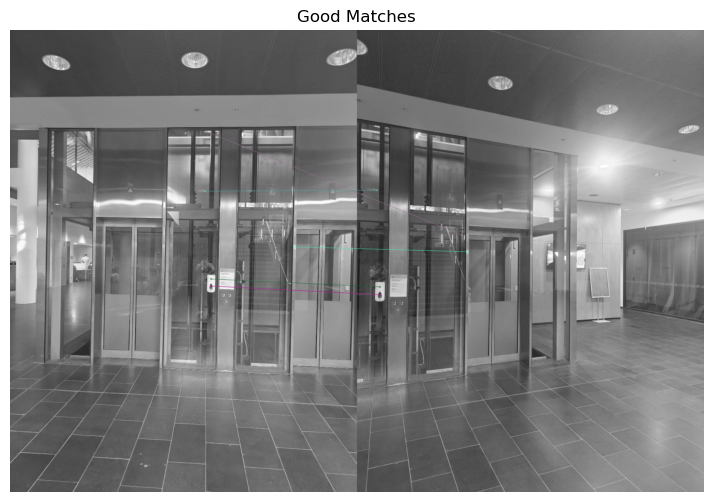

In [34]:
# Draw the good matches
img_matches = cv2.drawMatches(gray1, kp1_few, gray2, kp2_few, good_matches, None, flags=2)

plt.figure(figsize=(14, 6))
plt.imshow(img_matches, cmap='gray')
plt.title('Good Matches')
plt.axis('off')
plt.show()


Number of good matches: 278


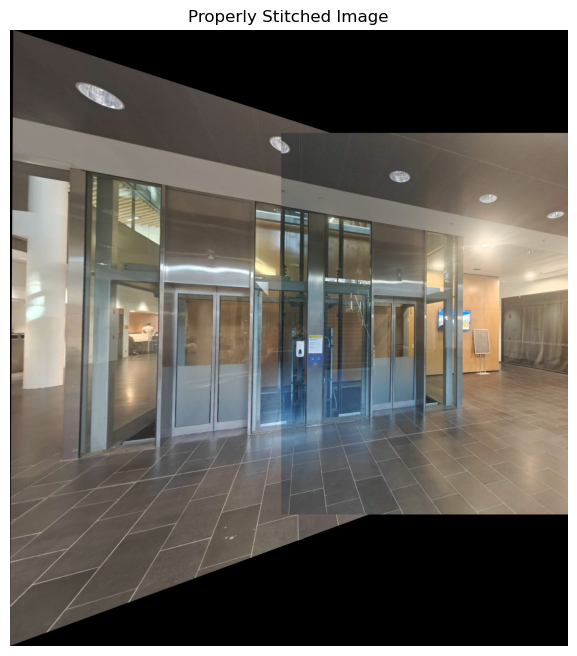

In [37]:
# Step 1: Use full SIFT for accurate feature extraction
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Step 2: Match keypoints using BFMatcher + Lowe's ratio test
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

print("Number of good matches:", len(good))

# Step 3: Compute Homography only if enough matches
if len(good) >= 4:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    if H is not None:
        # Step 4: Warp img1 into img2's perspective and stitch
        h1, w1 = img1.shape[:2]
        h2, w2 = img2.shape[:2]

        corners_img1 = np.float32([[0,0], [0,h1], [w1,h1], [w1,0]]).reshape(-1, 1, 2)
        transformed_corners = cv2.perspectiveTransform(corners_img1, H)
        all_corners = np.concatenate((transformed_corners, np.float32([[0,0], [0,h2], [w2,h2], [w2,0]]).reshape(-1, 1, 2)), axis=0)

        [x_min, y_min] = np.int32(all_corners.min(axis=0).ravel() - 0.5)
        [x_max, y_max] = np.int32(all_corners.max(axis=0).ravel() + 0.5)
        translation = [-x_min, -y_min]

        H_translation = np.array([[1, 0, translation[0]],
                                  [0, 1, translation[1]],
                                  [0, 0, 1]])

        stitched_img = cv2.warpPerspective(img1, H_translation @ H, (x_max - x_min, y_max - y_min))
        stitched_img[translation[1]:h2+translation[1], translation[0]:w2+translation[0]] = img2

        plt.figure(figsize=(16, 8))
        plt.imshow(cv2.cvtColor(stitched_img, cv2.COLOR_BGR2RGB))
        plt.title('Properly Stitched Image')
        plt.axis('off')
        plt.show()
    else:
        print("Homography computation failed.")
else:
    print("Not enough good matches to compute homography.")


In [9]:
import matplotlib.pyplot as plt
import cv2

# 读取图像并处理
img = cv2.imread('image1.jpg', cv2.IMREAD_GRAYSCALE)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# 显示
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Laplacian")
plt.imshow(laplacian, cmap='gray')

plt.show()


AttributeError: module 'matplotlib' has no attribute 'colors'

Error in callback <function _enable_matplotlib_integration.<locals>.configure_once at 0x000002446B01F060> (for post_run_cell), with arguments args (<ExecutionResult object at 2446b7c8380, execution_count=9 error_before_exec=None error_in_exec=module 'matplotlib' has no attribute 'colors' info=<ExecutionInfo object at 2446b7cacf0, raw_cell="import matplotlib.pyplot as plt
import cv2

# 读取图像.." store_history=True silent=False shell_futures=True cell_id=vscode-notebook-cell:/c%3A/Users/86176/Desktop/practice/9517/z5612479_lab2.ipynb#X25sZmlsZQ%3D%3D> result=None>,),kwargs {}:


AttributeError: module 'matplotlib' has no attribute 'backends'

Task 3: Keypoint Matching and Image Stitching
We performed image stitching by matching SIFT keypoints between two partially overlapping images.

🔹 a) Keypoint Matching
We used OpenCV’s BFMatcher and applied k-nearest neighbor (kNN) matching with k=2.
Lowe’s ratio test (distance < 0.75 * second_nearest) was used to filter out ambiguous matches.
The matched keypoints were visualized to confirm alignment.

🔹 b) Homography Estimation and Image Warping
A homography matrix H was estimated using RANSAC based on the filtered keypoint correspondences.
cv2.warpPerspective() was applied to warp one image into the perspective of the other.
To avoid clipping or negative coordinates, we calculated a translation matrix and padded the canvas accordingly.

Result:
The final stitched image shows a seamless transition between the two inputs, verifying the robustness of SIFT-based matching and homography estimation for real-world scenes.